In [1]:
import numpy as np
_substate_labels_list = [[2],[3,4]]

In [2]:
_qubit_list_sizes = []
for _, substate_label_list in enumerate(_substate_labels_list):
    _qubit_list_sizes.append(
        int(np.log2(len(substate_label_list))))

In [3]:
_qubit_list_sizes

[0, 1]

In [4]:
_indices_list = []
for _, sub_labels in enumerate(_substate_labels_list):
    _indices_list.append(
        {lab: ind for ind, lab in enumerate(sub_labels)})

In [5]:
_indices_list

[{2: 0}, {3: 0, 4: 1}]

In [6]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import noise
import qiskit.ignis.mitigation as mit
from qiskit.ignis.mitigation.measurement import tensored_meas_cal, TensoredMeasFitter

In [7]:
qr = qiskit.QuantumRegister(5)
mit_pattern = [[2],[3,4]]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')

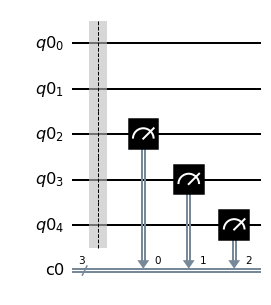

In [8]:
meas_calibs[0].draw("mpl")

In [9]:
[1,2,3,4,5,6][::-1]

[6, 5, 4, 3, 2, 1]

In [10]:
max([1,2,3,4,5])

5

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
import time
import sys
import platform

In [12]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.2',
 'qiskit-ignis': '0.6.0.dev0+0c0d00a',
 'qiskit-ibmq-provider': '0.12.0.dev0+14b4ce6',
 'qiskit-aqua': None,
 'qiskit': None}

In [13]:
n = 4
print("experiment of ", n, "-qubit GHZ state")

# create n qubit tensored measurement calibration circuits
qr = qiskit.QuantumRegister(n)
mit_pattern = [[i] for i in range(n)]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
print("mit pattern: ", mit_pattern)
print("number of calibration circuits: ", len(meas_calibs), "-> the circuits for '000...0' and '111...1'")

# prepare noise model of n qubits
noise_model = noise.NoiseModel()
for qi in range(n):
    read_err = noise.errors.readout_error.ReadoutError([[0.9, 0.1],[0.25,0.75]])
    noise_model.add_readout_error(read_err, [qi])

# execute the calibration circuits
job = qiskit.execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=5000, noise_model=noise_model)
cal_results = job.result()
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)
print(meas_fitter.cal_matrices)

# create n-qubit GHZ state
m = n
cr = ClassicalRegister(m)
ghz = QuantumCircuit(qr, cr)
ghz.h(qr[0])
for i in range(1,m):
    ghz.cx(qr[0], qr[i])
ghz.barrier()
for i in range(m):
    ghz.measure(qr[i],cr[i])
# ghz.draw("mpl")

# execute GHZ circuit
job = qiskit.execute([ghz], backend=Aer.get_backend("qasm_simulator"), shots=5000, noise_model=noise_model)
noisy_counts = job.result().get_counts()

# Get the filter object
meas_filter = meas_fitter.filter

t1 = time.time()
# Results with mitigation
mitigated_counts = meas_filter.apply(noisy_counts)
t2 = time.time()

print(noisy_counts)
print(mitigated_counts)

print("time of mitigation for", n, "qubits GHZ state: ", t2 - t1, "[s]")

experiment of  4 -qubit GHZ state
mit pattern:  [[0], [1], [2], [3]]
number of calibration circuits:  2 -> the circuits for '000...0' and '111...1'
[array([[0.9012, 0.2492],
       [0.0988, 0.7508]]), array([[0.8962, 0.2456],
       [0.1038, 0.7544]]), array([[0.9024, 0.249 ],
       [0.0976, 0.751 ]]), array([[0.896, 0.245],
       [0.104, 0.755]])]
{'0000': 1660, '0001': 190, '0010': 234, '0011': 110, '0100': 214, '0101': 116, '0110': 111, '0111': 256, '1000': 205, '1001': 87, '1010': 107, '1011': 249, '1100': 119, '1101': 275, '1110': 261, '1111': 806}
{'0000': 2505.5875751799845, '0010': 18.67810118420751, '0011': 4.4008010126675434e-14, '0100': 10.51753101278923, '0101': 9.3866735673305e-13, '0110': 8.650271796604991e-13, '1100': 9.64421955924194e-13, '1101': 9.447800389873617, '1111': 2455.7689922331506}
time of mitigation for 4 qubits GHZ state:  0.12403488159179688 [s]


In [14]:
n = 5
print("experiment of ", n, "-qubit GHZ state")

# create n qubit tensored measurement calibration circuits
qr = qiskit.QuantumRegister(n)
mit_pattern = [[i] for i in range(n)]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
print("mit pattern: ", mit_pattern)
print("number of calibration circuits: ", len(meas_calibs), "-> the circuits for '000...0' and '111...1'")

# prepare noise model of n qubits
noise_model = noise.NoiseModel()
for qi in range(n):
    read_err = noise.errors.readout_error.ReadoutError([[0.9, 0.1],[0.25,0.75]])
    noise_model.add_readout_error(read_err, [qi])

# execute the calibration circuits
job = qiskit.execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=5000, noise_model=noise_model)
cal_results = job.result()
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)
print(meas_fitter.cal_matrices)

# create n-qubit GHZ state
m = n
cr = ClassicalRegister(m)
ghz = QuantumCircuit(qr, cr)
ghz.h(qr[0])
for i in range(1,m):
    ghz.cx(qr[0], qr[i])
ghz.barrier()
for i in range(m):
    ghz.measure(qr[i],cr[i])
# ghz.draw("mpl")

# execute GHZ circuit
job = qiskit.execute([ghz], backend=Aer.get_backend("qasm_simulator"), shots=5000, noise_model=noise_model)
noisy_counts = job.result().get_counts()

print(noisy_counts.values())
# Get the filter object
meas_filter = meas_fitter.filter

t1 = time.time()
# Results with mitigation
mitigated_counts = meas_filter.apply(noisy_counts, method="fast", threshold=50)
t2 = time.time()

print(noisy_counts)
print(mitigated_counts)

print("time of mitigation for", n, "qubits GHZ state: ", t2 - t1, "[s]")

experiment of  5 -qubit GHZ state
mit pattern:  [[0], [1], [2], [3], [4]]
number of calibration circuits:  2 -> the circuits for '000...0' and '111...1'
[array([[0.902, 0.255],
       [0.098, 0.745]]), array([[0.9066, 0.2514],
       [0.0934, 0.7486]]), array([[0.9014, 0.2594],
       [0.0986, 0.7406]]), array([[0.8984, 0.2504],
       [0.1016, 0.7496]]), array([[0.8952, 0.2588],
       [0.1048, 0.7412]])]
dict_values([1487, 169, 164, 37, 41, 71, 44, 86, 63, 201, 35, 76, 56, 215, 70, 191, 192, 576, 175, 45, 159, 36, 35, 65, 180, 43, 52, 57, 48, 76, 70, 185])
32
16
11
7
4
3

{'00000': 1487, '00001': 169, '10000': 164, '10001': 37, '10010': 41, '10011': 71, '10100': 44, '10101': 86, '10110': 63, '10111': 201, '11000': 35, '11001': 76, '11010': 56, '11011': 215, '11100': 70, '11101': 191, '11110': 192, '11111': 576, '00010': 175, '00011': 45, '00100': 159, '00101': 36, '00110': 35, '00111': 65, '01000': 180, '01001': 43, '01010': 52, '01011': 57, '01100': 48, '01101': 76, '01110': 70, '01

In [15]:
noisy_counts.values()

dict_values([1487, 169, 164, 37, 41, 71, 44, 86, 63, 201, 35, 76, 56, 215, 70, 191, 192, 576, 175, 45, 159, 36, 35, 65, 180, 43, 52, 57, 48, 76, 70, 185])

In [16]:
{key:noisy_counts[key] for key in sorted(noisy_counts)}

{'00000': 1487,
 '00001': 169,
 '00010': 175,
 '00011': 45,
 '00100': 159,
 '00101': 36,
 '00110': 35,
 '00111': 65,
 '01000': 180,
 '01001': 43,
 '01010': 52,
 '01011': 57,
 '01100': 48,
 '01101': 76,
 '01110': 70,
 '01111': 185,
 '10000': 164,
 '10001': 37,
 '10010': 41,
 '10011': 71,
 '10100': 44,
 '10101': 86,
 '10110': 63,
 '10111': 201,
 '11000': 35,
 '11001': 76,
 '11010': 56,
 '11011': 215,
 '11100': 70,
 '11101': 191,
 '11110': 192,
 '11111': 576}

<BarContainer object of 32 artists>

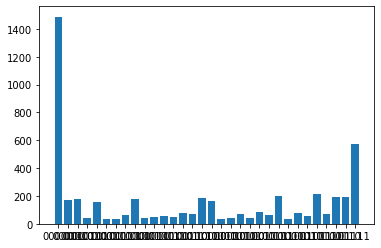

In [17]:
plt.bar(sorted(noisy_counts), [noisy_counts[key] for key in sorted(noisy_counts)])

<BarContainer object of 2 artists>

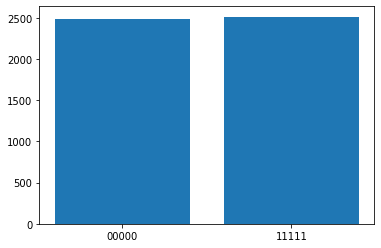

In [18]:
plt.bar(sorted(mitigated_counts), [mitigated_counts[key] for key in sorted(mitigated_counts)])

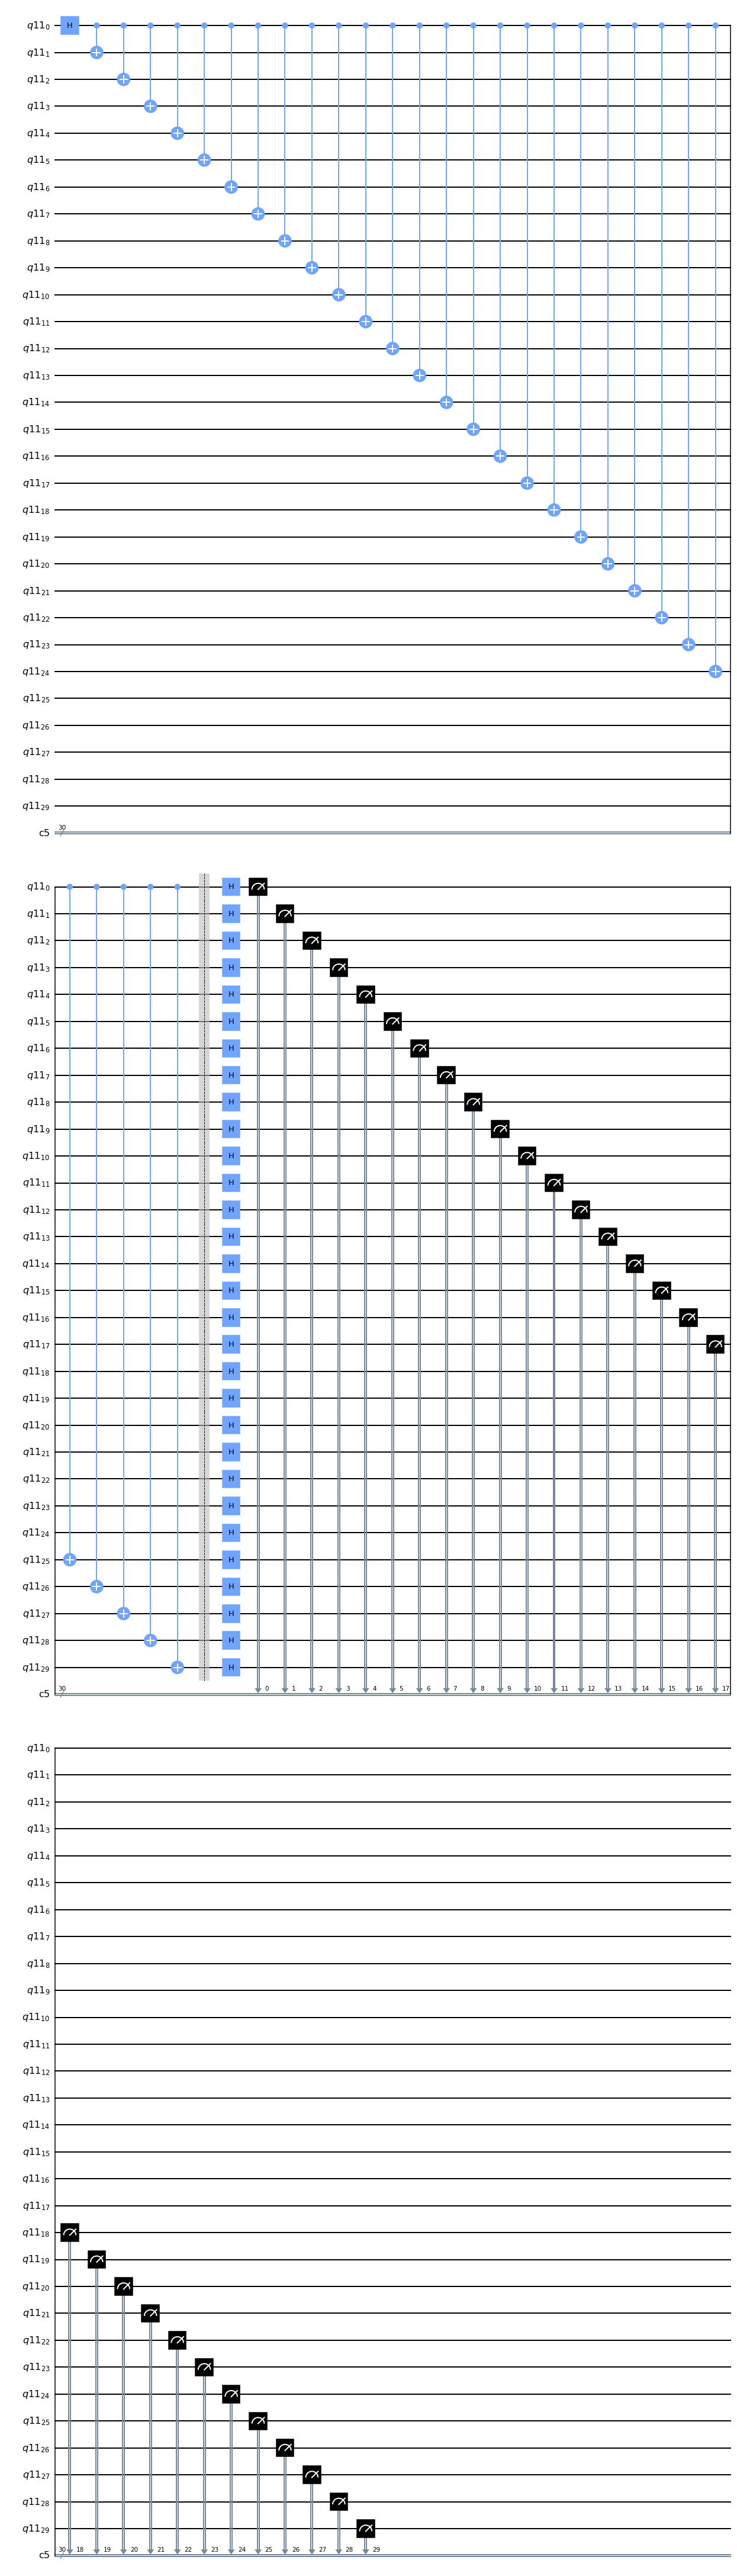

In [19]:
m = 30
qr = QuantumRegister(m)
cr = ClassicalRegister(m)
ghz = QuantumCircuit(qr, cr)
ghz.h(qr[0])
for i in range(1,m):
    ghz.cx(qr[0], qr[i])
ghz.barrier()
ghz.h(range(m))
for i in range(m):
    ghz.measure(qr[i],cr[i])
ghz.draw("mpl")

In [20]:
# execute GHZ circuit
job = qiskit.execute([ghz], backend=Aer.get_backend("qasm_simulator"), shots=5000)
counts = job.result().get_counts()

In [21]:
len(counts)

5000

In [22]:
n = 12
print("experiment of ", n, "-qubit GHZ state")

# create n qubit tensored measurement calibration circuits
qr = qiskit.QuantumRegister(n)
mit_pattern = [[i] for i in range(n)]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
print("mit pattern: ", mit_pattern)
print("number of calibration circuits: ", len(meas_calibs), "-> the circuits for '000...0' and '111...1'")

# prepare noise model of n qubits
noise_model = noise.NoiseModel()
for qi in range(n):
    read_err = noise.errors.readout_error.ReadoutError([[0.9, 0.1],[0.3,0.7]])
    noise_model.add_readout_error(read_err, [qi])

# execute the calibration circuits
job = qiskit.execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=5000, noise_model=noise_model)
cal_results = job.result()
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)
print(meas_fitter.cal_matrices)

# create n-qubit GHZ state
m = n
cr = ClassicalRegister(m)
ghz = QuantumCircuit(qr, cr)
ghz.h(qr[0])
for i in range(1,m):
    ghz.cx(qr[0], qr[i])
ghz.barrier()
ghz.h(range(m))
for i in range(m):
    ghz.measure(qr[i],cr[i])
# ghz.draw("mpl")

# execute GHZ circuit
job = qiskit.execute([ghz], backend=Aer.get_backend("qasm_simulator"), shots=5000, noise_model=noise_model)
noisy_counts = job.result().get_counts()

# Get the filter object
meas_filter = meas_fitter.filter

t1 = time.time()
# Results with mitigation
mitigated_counts = meas_filter.apply(noisy_counts, method="fast", threshold=1)
t2 = time.time()

print(noisy_counts)
print(len(noisy_counts))
print(mitigated_counts)
print(len(mitigated_counts))

print("time of mitigation for", n, "qubits GHZ state: ", t2 - t1, "[s]")

experiment of  12 -qubit GHZ state
mit pattern:  [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]
number of calibration circuits:  2 -> the circuits for '000...0' and '111...1'
[array([[0.9052, 0.3014],
       [0.0948, 0.6986]]), array([[0.9034, 0.2976],
       [0.0966, 0.7024]]), array([[0.9032, 0.3024],
       [0.0968, 0.6976]]), array([[0.901 , 0.2968],
       [0.099 , 0.7032]]), array([[0.8954, 0.302 ],
       [0.1046, 0.698 ]]), array([[0.9044, 0.2986],
       [0.0956, 0.7014]]), array([[0.898 , 0.2956],
       [0.102 , 0.7044]]), array([[0.9054, 0.3028],
       [0.0946, 0.6972]]), array([[0.8958, 0.296 ],
       [0.1042, 0.704 ]]), array([[0.8964, 0.3126],
       [0.1036, 0.6874]]), array([[0.9016, 0.297 ],
       [0.0984, 0.703 ]]), array([[0.8992, 0.2998],
       [0.1008, 0.7002]])]
2497
2099
1879
1772
1679
1614
1559
1516
1480
1443
1426
1403
1392

{'000000000000': 9, '000000000001': 10, '000000010000': 9, '000100000000': 11, '000100000001': 4, '000100000010': 3, '

In [23]:
a = np.zeros(1500)
pprint(a.tolist())

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [24]:
noisy_counts.values()

dict_values([9, 10, 9, 11, 4, 3, 4, 6, 1, 6, 2, 3, 2, 3, 3, 4, 2, 3, 2, 4, 2, 4, 7, 3, 2, 1, 2, 2, 3, 2, 2, 1, 1, 1, 4, 9, 2, 4, 1, 1, 1, 6, 4, 3, 1, 1, 1, 3, 2, 2, 2, 3, 5, 1, 4, 1, 2, 2, 2, 1, 2, 1, 3, 5, 1, 3, 4, 3, 2, 3, 2, 4, 3, 1, 4, 2, 1, 2, 2, 1, 2, 6, 1, 3, 1, 3, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 2, 2, 1, 3, 1, 4, 1, 2, 1, 2, 1, 1, 5, 6, 3, 4, 1, 1, 1, 1, 5, 2, 1, 2, 1, 3, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 5, 1, 3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2, 1, 3, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 6, 3, 1, 1, 2, 2, 3, 1, 1, 4, 2, 2, 2, 2, 1, 1, 5, 3, 1, 1, 1, 1, 1, 3, 1, 1, 4, 5, 1, 2, 4, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 7, 13, 5, 6, 6, 1, 7, 3, 3, 2, 8, 2, 1, 1, 1, 1, 2, 1, 7, 7, 2, 2, 1, 4, 2, 3, 1, 2, 1, 2, 2, 3, 4, 1, 1, 6, 8, 2, 4, 6, 3, 1, 3, 1, 2, 1, 3, 2, 1, 1, 3, 2, 4, 1, 2, 4, 2, 3, 1, 2, 2, 2, 1, 1, 2, 8, 7, 2, 1, 3, 3, 2, 3, 2, 2, 4, 2, 1, 2, 3, 2, 3, 4, 1, 2, 1, 4, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 4, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 3, 1, 2, 

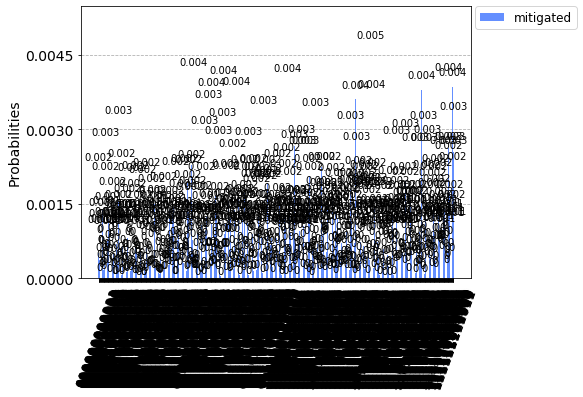

In [25]:
plot_histogram([mitigated_counts], legend=['mitigated'])

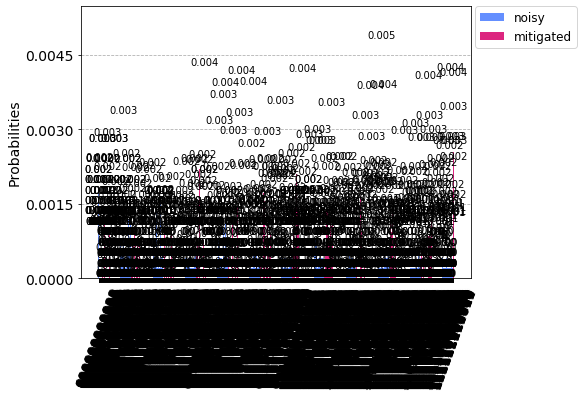

In [26]:
plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])